In [1]:

!pip install -Uqq fastbook
import fastbook
from fastbook import *
from matplotlib import pyplot as plt

In [2]:
path = untar_data(URLs.MNIST_SAMPLE)
path

Path('/Users/zahrazaredar/.fastai/data/mnist_sample')

In [3]:
path.ls()

(#3) [Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/labels.csv'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/train')]

In [4]:
(path /"train").ls()

(#2) [Path('/Users/zahrazaredar/.fastai/data/mnist_sample/train/7'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/train/3')]

In [5]:
threes = (path/'train/3').ls().sorted()
sevens = (path/'train/7').ls().sorted()

In [6]:
sevens
im10_path = sevens[10]
im7 = Image.open(im10_path)
im7

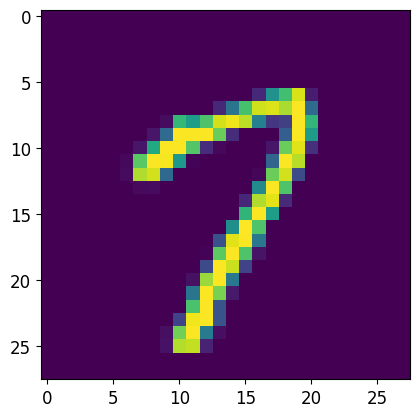

In [7]:
im7_array = array(im7)
plt.imshow(im7_array)

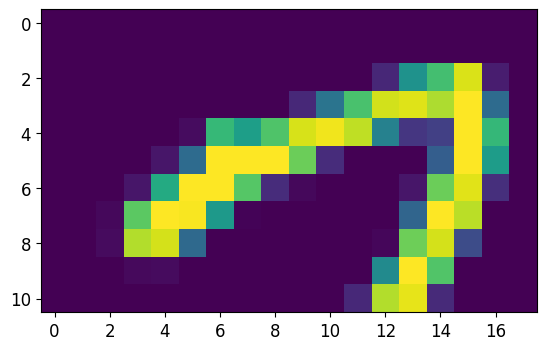

In [8]:
im7_tensor = tensor(im7)
plt.imshow(im7_tensor[4:15, 4:22])

In [9]:
df = pd.DataFrame(im7_tensor[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('BuPu')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,28,129,178,240,20,0
3,0,0,0,0,0,0,0,0,0,29,98,181,237,242,223,254,89,0
4,0,0,0,0,0,8,170,142,184,239,249,230,112,40,48,254,169,0
5,0,0,0,0,15,89,254,254,254,197,32,0,0,0,76,254,140,0
6,0,0,0,15,155,254,254,187,32,5,0,0,0,15,197,243,34,0
7,0,0,5,190,254,252,136,2,0,0,0,0,0,83,254,228,0,0
8,0,0,7,225,238,87,0,0,0,0,0,0,4,198,238,59,0,0
9,0,0,0,6,7,0,0,0,0,0,0,0,122,254,185,0,0,0


In [10]:
three_tensors = [tensor(Image.open(f)) for f in threes]
seven_tensors = [tensor(Image.open(f)) for f in sevens] 

In [11]:
len(seven_tensors)

6265

In [14]:
seven_tensors[0].shape

torch.Size([28, 28])

In [15]:

stacked_threes = torch.stack(three_tensors).float() / 255
stacked_sevens = torch.stack(seven_tensors).float() / 255

In [17]:
stacked_threes.shape
a_3 = stacked_threes[34]
a_7 = stacked_sevens[54]
a_3.shape

torch.Size([28, 28])

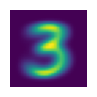

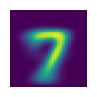

In [18]:
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)

show_image(mean3), show_image(mean7);

In [24]:
 def img_distance(a, b):
     return (a - b).abs().mean()

print(img_distance(a_7, mean7))
print(img_distance(a_7, mean3))

tensor(0.1084)
tensor(0.1410)


In [25]:
(path / 'valid/7').ls()

(#1028) [Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/9294.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/1186.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/6825.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/4767.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/6170.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/6164.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/9257.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/4773.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/8175.png'),Path('/Users/zahrazaredar/.fastai/data/mnist_sample/valid/7/6158.png')...]

In [26]:

# Stack tensors:
valid_3_tensors = torch.stack([tensor(Image.open(f)) for f in (path/'valid/3').ls()])
valid_7_tensors = torch.stack([tensor(Image.open(f)) for f in (path/'valid/7').ls()])

# Normalize tensors:
valid_3_tensors = valid_3_tensors.float()/255
valid_7_tensors = valid_7_tensors.float()/255

print(valid_3_tensors.shape)

torch.Size([1010, 28, 28])


In [33]:
def mnist_distance(a,b): return (a-b).abs().mean((-1,-2))
mnist_distance(a_3, mean3)
     

tensor(0.1331)

In [34]:
def img_distance(input, mean_tensor): 
    return (input-mean_tensor).abs().mean((-1,-2))

def is_3(x): 
    return (img_distance(x, mean3) < mnist_distance(x, mean7)).float()

In [35]:
is_3(valid_3_tensors).shape

torch.Size([1010])